In [1]:
# import data 
# data from Kaggle: https://www.kaggle.com/datasets/imdevskp/world-population-19602018
import pandas as pd

df = pd.read_csv('population_total_long.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  12595 non-null  object
 1   Year          12595 non-null  int64 
 2   Count         12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


<AxesSubplot:xlabel='Year'>

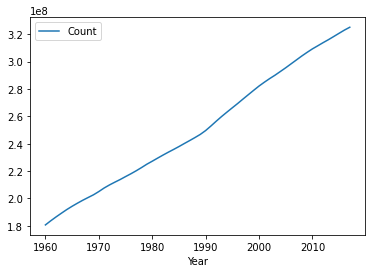

In [5]:
# select relevant columns & visualize population growth
df_us = df[(df['Country Name']=='United States')]
df_us = df_us.drop(columns=['Country Name'])
df_us.plot(x='Year',y='Count')

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           9.45e-69
Time:                        15:11:32   Log-Likelihood:                -942.01
No. Observations:                  58   AIC:                             1888.
Df Residuals:                      56   BIC:                             1892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.861e+09   4.35e+07   -111.858      0.0

C:\Users\Captainbmcrea\AppData\Local\Temp\ipykernel_13856\3338109958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_linear['Count_linear']=regression.fittedvalues


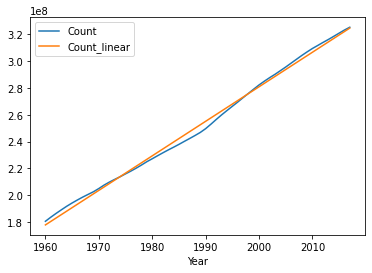

In [8]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

df_us_linear = df_us[['Year','Count']]
regression = sm.ols(data = df_us_linear, formula='Count ~ Year').fit()
print(regression.summary())
df_us_linear['Count_linear']=regression.fittedvalues

fig, ax = plt.subplots()
df_us_linear.plot(x='Year',y='Count', ax = ax)
df_us_linear.plot(x='Year',y='Count_linear', ax = ax)
plt.show()

                              Holt Model Results                              
Dep. Variable:                  Count   No. Observations:                   58
Model:                           Holt   SSE                 42546666799640.320
Optimized:                      False   AIC                           1592.628
Trend:                       Additive   BIC                           1600.870
Seasonal:                        None   AICC                          1594.275
Seasonal Periods:                None   Date:                 Sun, 17 Apr 2022
Box-Cox:                        False   Time:                         15:48:02
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4000000                alpha                False
smoothing_trend            0.2000000                

d:\Alice\Data Science\population_growth\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JUL will be used.
  self._init_dates(dates, freq)


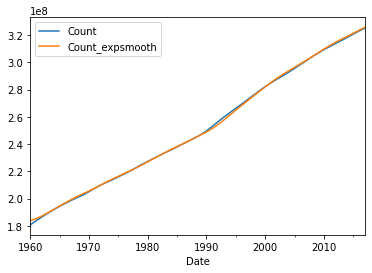

In [36]:
pd.options.mode.chained_assignment = None

import statsmodels.tsa.holtwinters as sm_holt

df_us_holt = df_us[['Year','Count']]
df_us_holt['Date'] = pd.to_datetime(df_us_holt['Year'].astype(str)+"-07-01")
df_us_holt = df_us_holt.set_index('Date').drop(columns=['Year'])

exp_smooth = sm_holt.Holt(df_us_holt).fit(smoothing_level = 0.4, smoothing_trend = 0.2, optimized=False)
print(exp_smooth.summary())

df_us_holt['Count_expsmooth'] = exp_smooth.fittedvalues

fig, ax = plt.subplots()
df_us_holt.plot(use_index=True,y='Count', ax = ax)
df_us_holt.plot(use_index=True,y='Count_expsmooth', ax = ax)
plt.show()

[ 8.57297194e+03 -3.15236844e+07  2.90350224e+10]


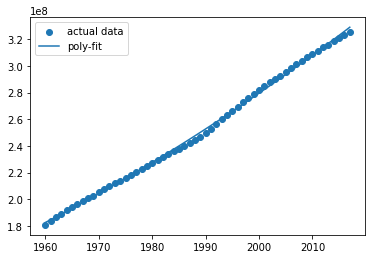

In [27]:
import numpy as np

x = df_us['Year']
y = df_us['Count']
poly_fit = np.polyfit(x,y,2)
print(poly_fit)
poly_y = poly_fit[0]*(x**2)+poly_fit[1]*x+poly_fit[2]

plt.scatter(x,y, label='actual data')
plt.plot(x, poly_y, label = 'poly-fit')
plt.legend()
plt.show()
